In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from keras import models
from keras import layers
import matplotlib.pyplot as plt

Verover de data. Het is een dataset van IMDB met filmrecensies. De labels zijn binair en geven aan of een film wel of geen aanrader is volgens de reviews.

In [3]:
from tensorflow.keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=10000,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=42,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

bekijk de geimporteerde data.

In [5]:
X_train[0:10]

array([list([1, 11, 4079, 11, 4, 1986, 745, 3304, 299, 1206, 590, 3029, 1042, 37, 47, 27, 1269, 2, 7637, 19, 6, 3586, 15, 1367, 3196, 17, 1002, 723, 1768, 2887, 757, 46, 4, 232, 1131, 39, 107, 3589, 11, 4, 4539, 198, 24, 4, 1834, 133, 4, 107, 7, 98, 413, 8911, 5835, 11, 35, 781, 8, 169, 4, 2179, 5, 259, 334, 3773, 8, 4, 3497, 10, 10, 17, 16, 3381, 46, 34, 101, 612, 7, 84, 18, 49, 282, 167, 2, 7173, 122, 24, 1414, 8, 177, 4, 392, 531, 19, 259, 15, 934, 40, 507, 39, 2, 260, 77, 8, 162, 5097, 121, 4, 65, 304, 273, 13, 70, 1276, 2, 8, 15, 745, 3304, 5, 27, 322, 2197, 2, 2, 70, 30, 2, 88, 17, 6, 3029, 1042, 29, 100, 30, 4943, 50, 21, 18, 148, 15, 26, 5980, 12, 152, 157, 10, 10, 21, 19, 3196, 46, 50, 5, 4, 1636, 112, 828, 6, 1003, 4, 162, 5097, 2, 517, 6, 2, 7, 4, 9527, 5593, 4, 351, 232, 385, 125, 6, 1693, 39, 2383, 5, 29, 69, 5593, 5670, 6, 162, 5097, 1567, 232, 256, 34, 718, 5612, 2980, 8, 6, 226, 762, 7, 2, 7830, 5, 517, 2, 6, 3242, 7, 4, 351, 232, 37, 9, 1861, 8, 123, 3196, 2, 5612, 188

Zoals je kunt zien bevat `X_train` vectoren met getallen. Elke vector staat voor een review. Elk getal staat voor een woord.

Met onderstaande code kun je een vector met getallen terugvertalen naar woorden. Run deze code.

In [12]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[0]])
decoded_review

"? in panic in the streets richard widmark plays u s navy doctor who has his week ? interrupted with a corpse that contains plague as cop paul douglas properly points out the guy died from two bullets in the chest that's not the issue here the two of them become unwilling partners in an effort to find the killers and anyone else exposed to the disease br br as was pointed out by any number of people for some reason director ? kazan did not bother to cast the small parts with anyone that sounds like they're from ? having been to new orleans where the story takes place i can personally ? to that richard widmark and his wife barbara ? ? can be ? because as a navy doctor he could be assigned there but for those that are natives it doesn't work br br but with plague out there and the news being kept a secret the new orleans ? starts a ? of the city's underworld the dead guy came off a ship from europe and he had underworld connections a new orleans wise guy played by jack palance jumps to a

In de tekst zie je een aantal vraagtekens. Een vraagteken staat in dit geval voor 'onbekend woord'.

De input is in deze vorm lastig te verwerken voor een neuraal netwerk. De getallen zijn categorische labels. Daarom gebruiken we One-hot-encoding. Helaas kan de `OneHotEncoder` uit sklearn niet overweg met deze input. Daarom maken we de input handmatig geschikt voor het neurale netwerk.

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):

    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [6]:
X_train = vectorize_sequences(X_train)
X_test = vectorize_sequences(X_test)

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

Controleer of het omzetten van de data goed gegaan is

In [8]:
print(X_test, y_test)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]] [0. 0. 0. ... 0. 1. 1.]


Maak een neuraal netwerk dat met deze data overweg kan.

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(16, input_shape=(10000,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model and calculate its accuracy:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Print a summary of the Keras model:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

Kies een loss function en optimizer en compileer het netwerk. Bedenk hierbij goed welke het meest geschikt is voor het probleem dat je aan het oplossen bent en voor de vorm van de output.

In [11]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Split in train en validatieset

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Train je model model met de gemaakte train- en validatieset. 

In [13]:
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 537ms/step - accuracy: 0.7039 - loss: 0.5868 - val_accuracy: 0.8688 - val_loss: 0.3625
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 34s 283ms/step - accuracy: 0.8984 - loss: 0.3045 - val_accuracy: 0.8602 - val_loss: 0.3347
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 164ms/step - accuracy: 0.9185 - loss: 0.2315 - val_accuracy: 0.8950 - val_loss: 0.2713
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9358 - loss: 0.1821 - val_accuracy: 0.8618 - val_loss: 0.3421
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9432 - loss: 0.1660 - val_accuracy: 0.8918 - val_loss: 0.2801
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.9603 - loss: 0.1272 - val_accuracy: 0.8966 - val_loss: 0.2755
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9666 - loss: 0.1110 - val_accuracy: 0.8952 - val_loss: 0.2877
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.9742 - loss: 0.0929 - val_accuracy: 0.88

Plot een learning curve. Zet de accuraatheid uit tegen de epochs en maak onderscheid tussen de training en validatie data. Wat zou volgens dit figuur het optimale aantal epochs zijn?

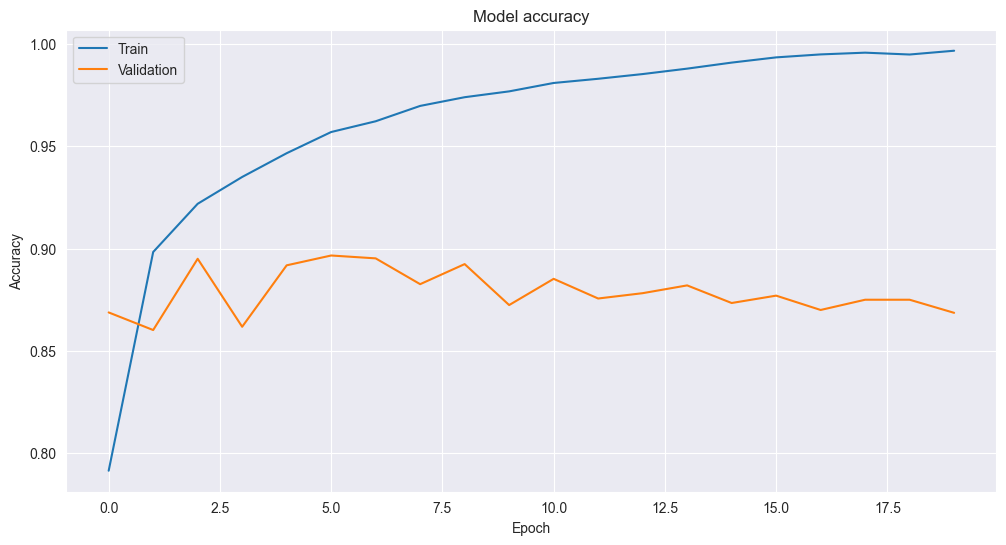

In [14]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

Plot een foutcurve. Zet de loss uit tegen de epochs en maak onderscheid tussen de training en validatie data. Bekijk of er misschien sprake is van overfitting/underfitting.

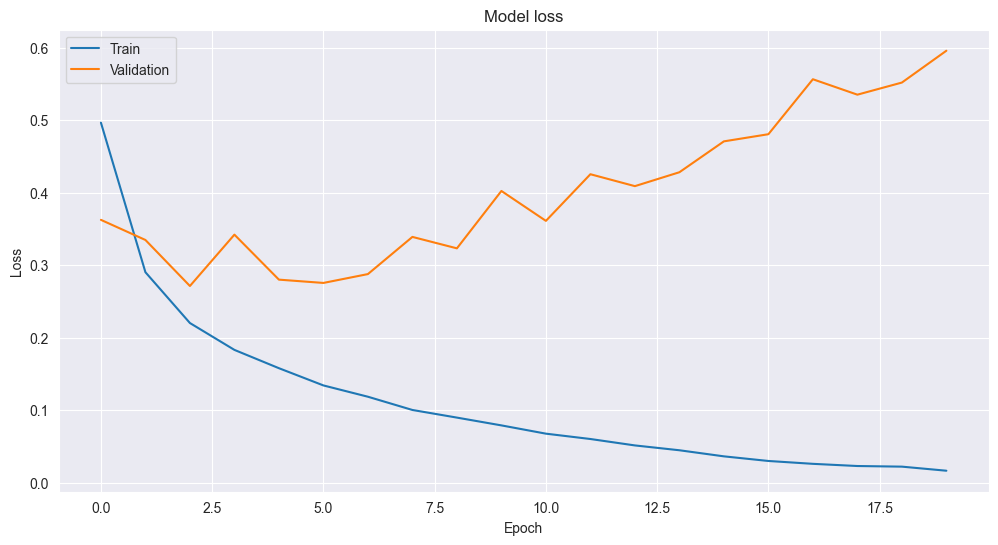

In [15]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

Test je model

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8530 - loss: 0.6669
Test Loss: 0.6817743182182312
Test Accuracy: 0.8517199754714966


Kijk wat er gebeurt met de foutcurves van de train en validatiedata en met de testscore als je verschillende netwerken maakt met verschillende instellingen (aantal lagen, aantal neuronen, optimizer).

Training model with 2 layers, 16 neurons, optimizer: RMSprop


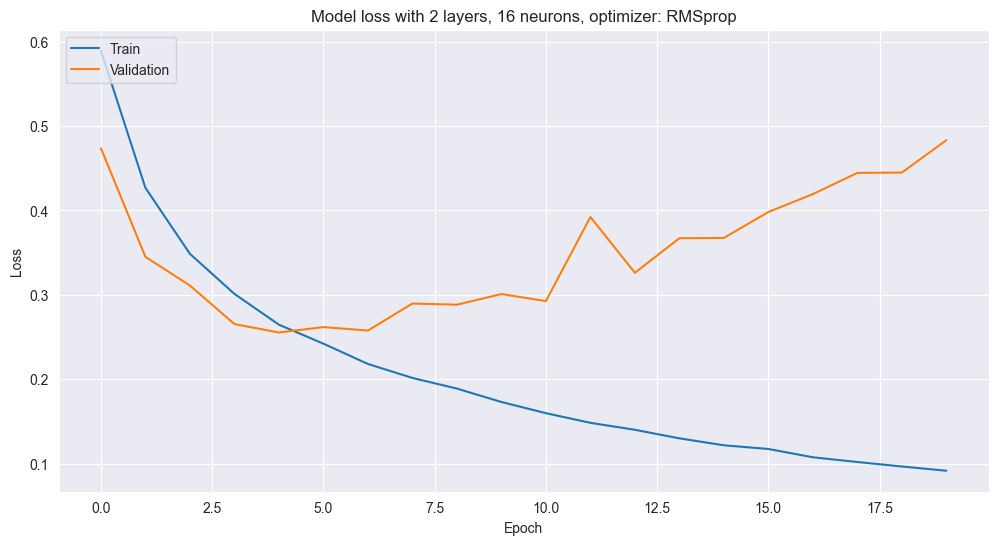

Test Loss: 0.5687881708145142
Test Accuracy: 0.8621199727058411
Training model with 3 layers, 32 neurons, optimizer: Adam


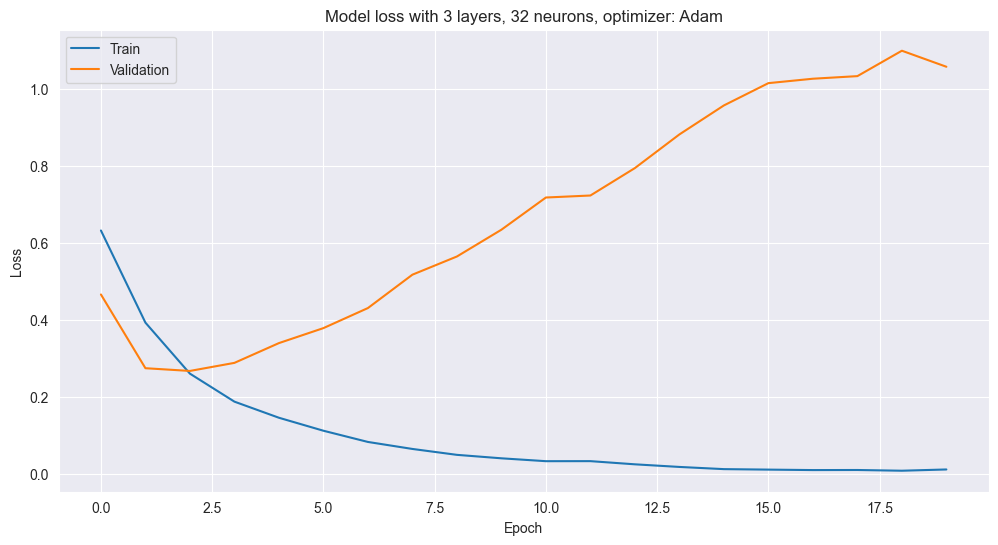

Test Loss: 1.209115743637085
Test Accuracy: 0.8526399731636047
Training model with 4 layers, 64 neurons, optimizer: RMSprop


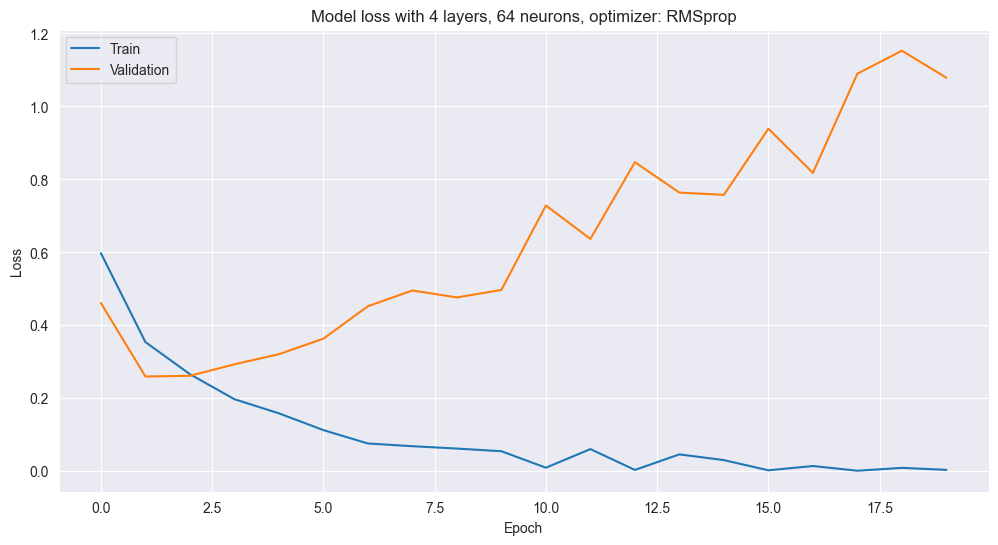

Test Loss: 1.283810019493103
Test Accuracy: 0.8706799745559692


In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam

def create_model(layers, neurons, optimizer):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(10000,), activation='relu'))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(0.5))  # Adding dropout layers to prevent overfitting
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Experiment with different configurations
configurations = [
    {'layers': 2, 'neurons': 16, 'optimizer': RMSprop()},
    {'layers': 3, 'neurons': 32, 'optimizer': Adam()},
    {'layers': 4, 'neurons': 64, 'optimizer': RMSprop()},
]

for config in configurations:
    print(f"Training model with {config['layers']} layers, {config['neurons']} neurons, optimizer: {config['optimizer'].__class__.__name__}")
    model = create_model(config['layers'], config['neurons'], config['optimizer'])
    history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val), verbose=0)

    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f"Model loss with {config['layers']} layers, {config['neurons']} neurons, optimizer: {config['optimizer'].__class__.__name__}")
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

    # Evaluate the model on the test data
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Loss: {test_loss}")
    print(f"Test Accuracy: {test_accuracy}")

Bonusvraag: Zoek uit wat dropout lagen voor deep learning zijn en experimenteer met dropout lagen in jouw netwerk. Welke effect heeft dit op de resultaten?